In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Spotify/data.csv")
df.head(10)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


In [8]:
df.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [12]:
value_count = df.count()
print("Number of non-null values in each column:")
print(value_count)

Number of non-null values in each column:
Unnamed: 0          2017
acousticness        2017
danceability        2017
duration_ms         2017
energy              2017
instrumentalness    2017
key                 2017
liveness            2017
loudness            2017
mode                2017
speechiness         2017
tempo               2017
time_signature      2017
valence             2017
target              2017
song_title          2017
artist              2017
dtype: int64


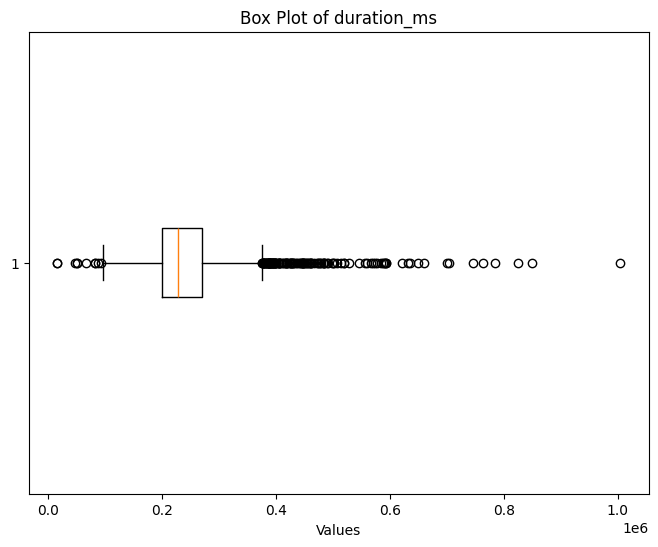

Minimum value: 16042
Maximum value: 1004627
Data type: int64
Data range: 988585
Quartiles: Q1=200015.0, Q2=229261.0, Q3=270333.0
Percentiles: [176650.2 194135.8 205724.6 217427.4 229261.  242701.  258418.4 285192.8
 332968. ]
Number of outliers: 141


In [14]:
min_value = df["duration_ms"].min()
max_value = df["duration_ms"].max()
data_type = df["duration_ms"].dtype
data_range = max_value - min_value
quartiles = np.percentile(df["duration_ms"], [25, 50, 75])
percentiles = np.percentile(df["duration_ms"], [10, 20, 30, 40, 50, 60, 70, 80, 90])
outliers = df[(df["duration_ms"] < (quartiles[0] - 1.5 * (quartiles[2] - quartiles[0]))) |
              (df["duration_ms"] > (quartiles[2] + 1.5 * (quartiles[2] - quartiles[0])))]

plt.figure(figsize=(8, 6))
plt.boxplot(df["duration_ms"], vert=False)
plt.title(f'Box Plot of {"duration_ms"}')
plt.xlabel('Values')
plt.show()

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")
print(f"Data type: {data_type}")
print(f"Data range: {data_range}")
print(f"Quartiles: Q1={quartiles[0]}, Q2={quartiles[1]}, Q3={quartiles[2]}")
print(f"Percentiles: {percentiles}")
print(f"Number of outliers: {len(outliers)}")

In [20]:
df = df.dropna(subset=['duration_ms'])
value_column = df['duration_ms'].count()
print(f"Number of values after cleaning : {value_column}")

Number of values after cleaning : 2017


In [27]:
df['acousticness'] = df['acousticness'].apply(lambda x: x * 2)
df['acousticness'].head()

0    0.0204
1    0.3980
2    0.0688
3    1.2080
4    0.3600
Name: acousticness, dtype: float64

In [34]:
bin_edges = [0, 10, 20, 30, 40, 50]
bin_labels = ['0-10', '11-20', '21-30', '31-40', '41-50']
# df['danceability'] = pd.to_numeric(df['danceability'])
df['discretized_column'] = pd.cut(df['duration_ms'], bins=bin_edges, labels=bin_labels)
print(df)

      Unnamed: 0  acousticness danceability  duration_ms  energy  \
0              0       0.02040         0-10       204600   0.434   
1              1       0.39800         0-10       326933   0.359   
2              2       0.06880         0-10       185707   0.412   
3              3       1.20800         0-10       199413   0.338   
4              4       0.36000         0-10       392893   0.561   
...          ...           ...          ...          ...     ...   
2012        2012       0.00212         0-10       274404   0.932   
2013        2013       0.17540         0-10       182182   0.892   
2014        2014       0.01714         0-10       207200   0.935   
2015        2015       0.00328         0-10       185600   0.992   
2016        2016       0.00562         0-10       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1             0.006110   

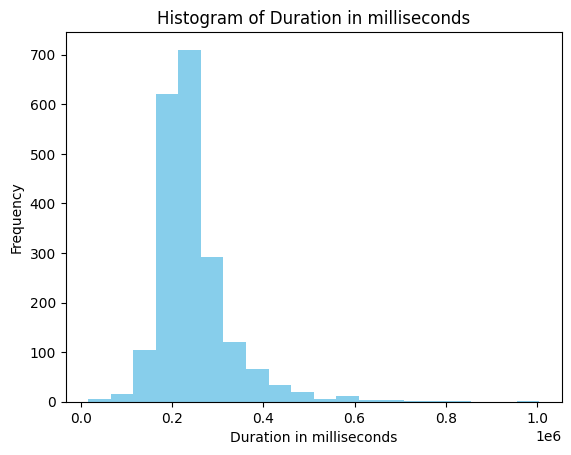

In [54]:
plt.hist(df['duration_ms'], bins=20, color='skyblue')
plt.xlabel('Duration in milliseconds')
plt.ylabel('Frequency')
plt.title('Histogram of Duration in milliseconds')
plt.show()

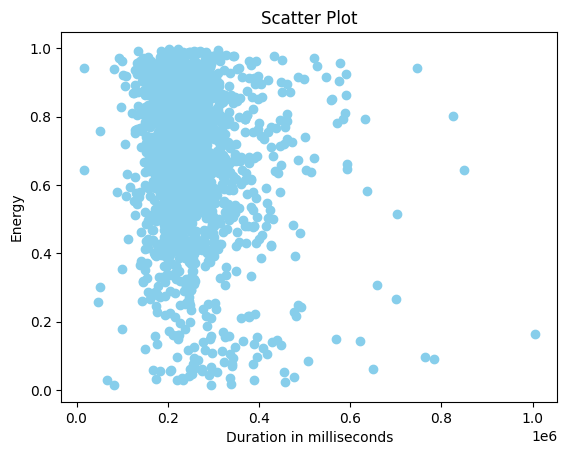

In [53]:
plt.scatter(df['duration_ms'], df['energy'], color='skyblue')
plt.xlabel('Duration in milliseconds')
plt.ylabel('Energy')
plt.title('Scatter Plot')
plt.show()

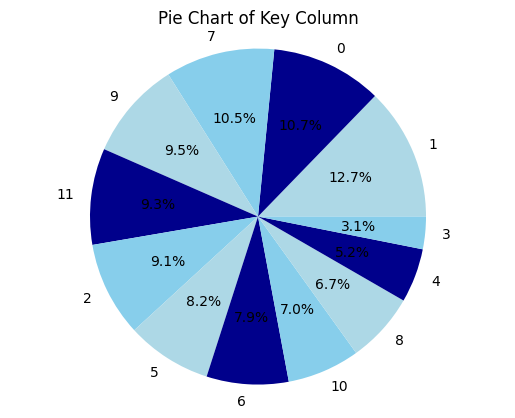

In [48]:
category_counts = df['key'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['lightblue', 'darkblue', 'skyblue'])
plt.title('Pie Chart of Key Column')
plt.axis('equal')
plt.show()

In [56]:
print(df.dtypes)

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object


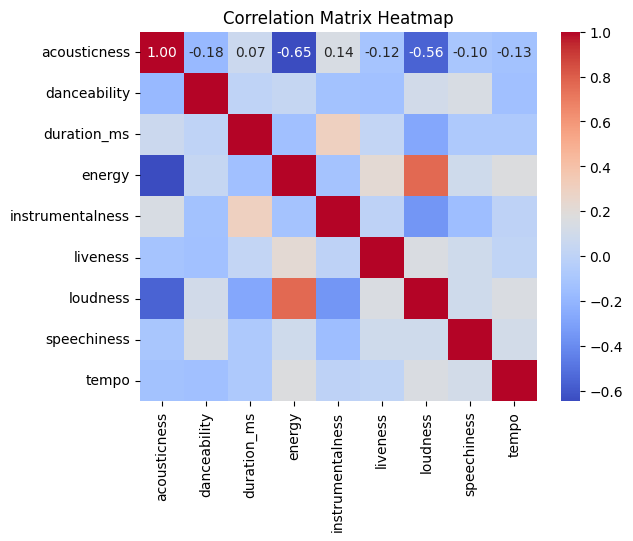

In [60]:
columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']
correlation_matrix = df[columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()